In [1]:
import torch
import segyio
import numpy as np
import matplotlib.pyplot as plt

from UNet import UNet

import warnings
warnings.filterwarnings('ignore')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
model_path = r'/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/Final Project/denoising_model.pth'
in_channel = 1
out_channel = 1

# Importing model
model = UNet(in_channel, out_channel)
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

UNet(
  (InputLayer): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Encoder1): ConvBlock(
    (Conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (BN1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (BN2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Encoder2): DownsamplingBlock(
    (Pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (ConvBlock): ConvBlock(
      (Conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (BN1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (Conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (BN2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (Encoder3): DownsamplingBlock(
  

In [3]:
# Importing SEG-Y data

dataset = r'/Users/dzianddafi/Documents/Tugas Akhir/TrainingData_Image.segy'
ss = segyio.tools.cube(dataset)
ss.shape

(590, 782, 1006)

In [4]:
print(f"Inline data = {np.shape(ss)[0]}")
print(f"Xline data = {np.shape(ss)[1]}")
print(f"Time Depth data = {np.shape(ss)[2]}")

Inline data = 590
Xline data = 782
Time Depth data = 1006


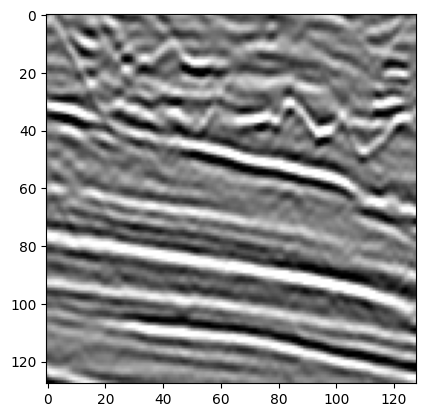

In [7]:
data = ss[589, :, :]

x1 = 0
z1 = 0
data1 = ss[589, x1:x1+128, z1:z1+128]

x2 = 400
z2 = 800
data2 = ss[589, x2:x2+128, z2:z2+128]

x3 = 300
z3 = 200
data3 = ss[589, x3:x3+128, z3:z3+128]

plt.imshow(data3.T, cmap='gray', vmin=-500, vmax=500)
plt.savefig(r'/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/Final Project/data3.png')
plt.show()

In [56]:
# Convert to Tensor
image_tensor1 = torch.tensor(data1.T, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
image_tensor2 = torch.tensor(data2.T, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
image_tensor3 = torch.tensor(data3.T, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

with torch.no_grad():
    denoised_image1 = model(image_tensor1)
    denoised_image2 = model(image_tensor2)
    denoised_image3 = model(image_tensor3)
    
denoised_image1 = denoised_image1.squeeze().cpu().numpy()
denoised_image2 = denoised_image2.squeeze().cpu().numpy()
denoised_image3 = denoised_image3.squeeze().cpu().numpy()

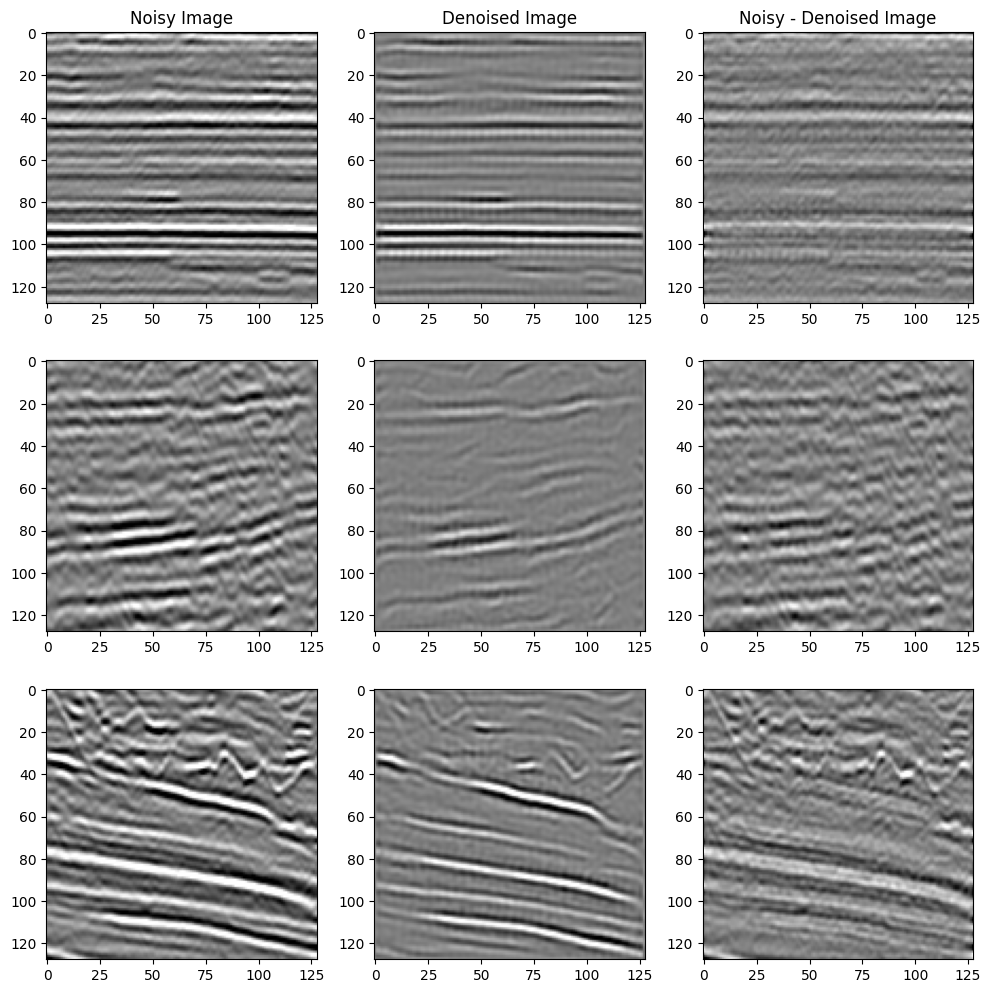

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.tight_layout()
ax[0,0].set_title("Noisy Image")
ax[0,0].imshow(data1.T, cmap='gray', vmin=-500, vmax=500)
ax[1,0].imshow(data2.T, cmap='gray', vmin=-500, vmax=500)
ax[2,0].imshow(data3.T, cmap='gray', vmin=-500, vmax=500)

ax[0,1].set_title("Denoised Image")
ax[0,1].imshow(denoised_image1, cmap='gray', vmin=-500, vmax=500)
ax[1,1].imshow(denoised_image2, cmap='gray', vmin=-500, vmax=500)
ax[2,1].imshow(denoised_image3, cmap='gray', vmin=-500, vmax=500)

ax[0,2].set_title("Noisy - Denoised Image")
ax[0,2].imshow((data1.T - denoised_image1), cmap='gray', vmin=-500, vmax=500)
ax[1,2].imshow((data2.T - denoised_image2), cmap='gray', vmin=-500, vmax=500)
ax[2,2].imshow((data3.T - denoised_image3), cmap='gray', vmin=-500, vmax=500)

plt.savefig(r'/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/Final Project/Denoising_result.png')
plt.show()

In [16]:
denoised_image.shape

(1006, 782)

In [19]:
data1.T.shape

(1006, 782)